In [18]:
import tensorflow as tf
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from keras.preprocessing.text import text_to_word_sequence
from collections import defaultdict
import pandas as pd    # to load dataset
import nltk 
import numpy as np
nltk.download('stopwords')
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
import os
from collections import defaultdict
from keras.preprocessing.text import text_to_word_sequence, Tokenizer

def get_info(path: str):
    data = list(os.walk(path))[1:]
    files = []
    for d in data:
        folder_name = d[0]
        for file in d[2]:
            files.append((folder_name.split('/')[-1], os.path.join(folder_name, file)))

    d = defaultdict(int)
    texts = defaultdict(list)
    for (cate, file) in files:
        with open(file, 'r') as outfile:
            text = outfile.read()
            texts[cate].append(text)
            words = text_to_word_sequence(text)
            for word in words:
                d[word] += 1
    words = sorted(d.items(), key=lambda x: x[1], reverse=True)
    return (texts, words)


In [21]:
datatest = get_info("C:/Users/arthu/OneDrive/Documents/Cours/ESIR3/Gitlab/AI_LEGRAND_MORVAN/TP_3/ohsumed-first-20000-docs/test")
datatraining = get_info("C:/Users/arthu/OneDrive/Documents/Cours/ESIR3/Gitlab/AI_LEGRAND_MORVAN/TP_3/ohsumed-first-20000-docs/training")
print(datatraining[0])
english_stops = set(stopwords.words('english'))

In [6]:
import matplotlib.pyplot as plt

# Liste des catégories
categories = list(datatest[0].keys())
categories2 = list(datatraining[0].keys())

# Listes pour stocker le nombre d'exemples par catégorie

def affichage_category(categories, dataset): 
    num_examples_per_category = []
    for category in categories:
        category_texts = dataset[0][category]
        num_examples = len(category_texts)
        print(f"Category: {category}, Number of Examples: {num_examples}")
        num_examples_per_category.append(num_examples)
    # Créer un graphique à barres
    plt.figure(figsize=(10, 6))
    plt.bar(categories, num_examples_per_category, color='blue')
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre d\'exemples')
    plt.title('Nombre d\'exemples par catégorie')
    plt.xticks(rotation=45, ha='right')  # Pour faire pivoter les étiquettes de catégorie
    plt.tight_layout()
    # Afficher le graphique
    plt.show()



Category: test\C01, Number of Examples: 506
Category: test\C02, Number of Examples: 233
Category: test\C03, Number of Examples: 70
Category: test\C04, Number of Examples: 1467
Category: test\C05, Number of Examples: 429
Category: test\C06, Number of Examples: 632
Category: test\C07, Number of Examples: 146
Category: test\C08, Number of Examples: 600
Category: test\C09, Number of Examples: 129
Category: test\C10, Number of Examples: 941
Category: test\C11, Number of Examples: 202
Category: test\C12, Number of Examples: 548
Category: test\C13, Number of Examples: 386
Category: test\C14, Number of Examples: 1301
Category: test\C15, Number of Examples: 320
Category: test\C16, Number of Examples: 228
Category: test\C17, Number of Examples: 348
Category: test\C18, Number of Examples: 400
Category: test\C19, Number of Examples: 191
Category: test\C20, Number of Examples: 695
Category: test\C21, Number of Examples: 717
Category: test\C22, Number of Examples: 91
Category: test\C23, Number of Ex

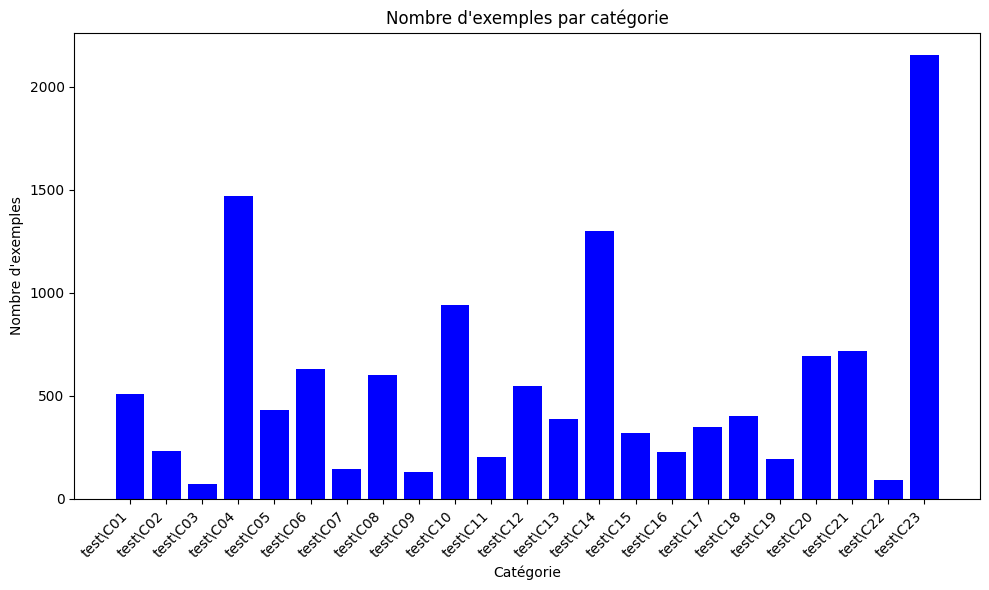

In [7]:
affichage_category(categories, datatest)


Category: training\C01, Number of Examples: 423
Category: training\C02, Number of Examples: 158
Category: training\C03, Number of Examples: 65
Category: training\C04, Number of Examples: 1163
Category: training\C05, Number of Examples: 283
Category: training\C06, Number of Examples: 588
Category: training\C07, Number of Examples: 100
Category: training\C08, Number of Examples: 473
Category: training\C09, Number of Examples: 125
Category: training\C10, Number of Examples: 621
Category: training\C11, Number of Examples: 162
Category: training\C12, Number of Examples: 491
Category: training\C13, Number of Examples: 281
Category: training\C14, Number of Examples: 1249
Category: training\C15, Number of Examples: 215
Category: training\C16, Number of Examples: 200
Category: training\C17, Number of Examples: 295
Category: training\C18, Number of Examples: 388
Category: training\C19, Number of Examples: 191
Category: training\C20, Number of Examples: 525
Category: training\C21, Number of Examp

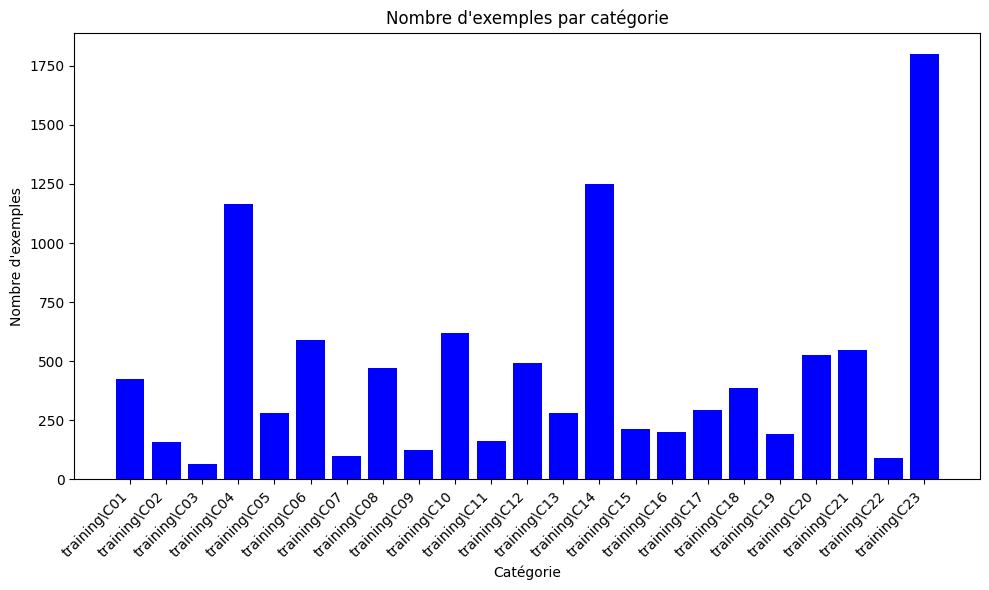

In [8]:
affichage_category(categories2, datatraining)

In [20]:
# Preprocessing
from sklearn.calibration import LabelEncoder


tokenizer = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
tokenizer.fit_on_texts(datatraining[0].values())
X_train_sequences = tokenizer.texts_to_sequences(datatraining[0].values())
X_test_sequences = tokenizer.texts_to_sequences(datatest[0].values())

vocab_size = len(tokenizer.word_index) + 1

max_length = 100

X_train = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test_sequences, maxlen=max_length, padding='post',truncating='post')

total_words = len(tokenizer.word_index) + 1   # add 1 because of 0 padding



# Neural Network

EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

# Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on Training Set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

# Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

NameError: name 'Flatten' is not defined